In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from time import sleep
from bs4 import BeautifulSoup
import re
import sys
import requests
import json
import datetime
import pandas as pd

In [7]:
search = "半導體"        

options = webdriver.ChromeOptions()
options.add_argument('--ignore-certificate-errors')
# options.add_argument('--proxy-server=101.9.200.184')
# options.add_argument('--incognito')
# options.add_argument('headless')                        
driver = webdriver.Chrome(chrome_options=options)
url = "https://www.google.com.tw/?hl=zh_TW"
driver.get(url)
driver.set_page_load_timeout(60)
driver.find_element(by=By.ID, value="APjFqb").send_keys(search)
driver.find_element(by=By.ID, value="APjFqb").send_keys(Keys.ENTER)
driver.find_element(by=By.CLASS_NAME, value="zItAnd").click() # search with href?

C:\Users\USER\AppData\Local\Temp\ipykernel_24692\4127300438.py:8: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chrome_options=options)


<!DOCTYPE html>
<html lang="zh-TW"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>半導體 - Google 搜尋</title><script nonce="8KbGO315Z8F-KbvU09gadg">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.google||{};var h=
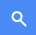
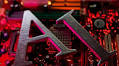
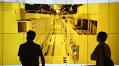
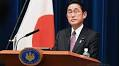

In [9]:
url = "https://www.google.com.tw/search?hl=zh_TW&sxsrf=AB5stBgL_t3yQ4NTUQPEkeiZ-rjWRUpJsg:1688889365412&q=%E9%AB%94&tbm=nws&sa=X&ved=2ahUKEwjutcKVk4GAAxX5i1YBHXw3B2UQ0pQJegQIDhAB&biw=721&bih=586&dpr=1.48"

sentiment_data = {}

url_ptt = "https://www.ptt.cc"
a = requests.get(url)
soup = BeautifulSoup(a.content, "html.parser")
soup

In [ ]:
search = "面板"
url = f"https://www.ptt.cc/bbs/Stock/search?q={search}"

sentiment_data = {}

url_ptt = "https://www.ptt.cc"
a = requests.get(url)
soup = BeautifulSoup(a.content, "html.parser")
n = soup.find_all("a", {"href": re.compile("/bbs/Stock/M.")})
for i in n:
    print("---------------------------")
    print(url_ptt + i["href"])
    new = requests.get(url_ptt + i["href"])
    soup = BeautifulSoup(new.content, "html.parser")
    main = soup.find_all("div", {"id": ["main-content"]}) # main = soup.select(".f3.hl") Multiple class, and
    textsss = main[0].text
    # news
    news = textsss[textsss.find("原文內容")+5:textsss.find("心得/評論")]
    # date
    date = textsss[textsss.find("發布時間")+5:textsss.find("發布時間")+16]# date_str = re.findall('\d{4}/\d{2}/\d{2}', textsss)    
    date_alter = re.findall(r"([A-Z][a-z]{2}) ([A-Z][a-z]{2})(\s{1,2}\d{1,2}) (\d{2}:\d{2}:\d{2}) (\d{4})", textsss)
    if len(date_alter) > 0:
        date_alter = [pd.to_datetime(date_alter[0][4] + "/" + month2digit.get(date_alter[0][1]) + "/" + str(int(date_alter[0][2][1:])))]
    date = date_alter[0] if len(date_alter) > 0 else 0

    # comment
    comment = soup.find_all("span", {"class": ["push-content"]}) # main = soup.select(".f3.hl") Multiple class, and
    comment_li = []
    for i in comment:
        comment_li.append(i.text) 

    if date != 0:
        sentiment_data.update({date: [news.replace("\n", ""), comment_li]})
print(sentiment_data)